In [6]:
#
#  Use k-means clustering to find the most-common colors in an image
#
import cv2
import numpy as np
from sklearn.cluster import KMeans


def make_histogram(cluster):
    """
    Count the number of pixels in each cluster
    :param: KMeans cluster
    :return: numpy histogram
    """
    numLabels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    hist, _ = np.histogram(cluster.labels_, bins=numLabels)
    hist = hist.astype('float32')
    hist /= hist.sum()
    return hist


def make_bar(height, width, color):
    """
    Create an image of a given color
    :param: height of the image
    :param: width of the image
    :param: BGR pixel values of the color
    :return: tuple of bar, rgb values
    """
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

# START HERE
img = cv2.imread('/Users/muratseyhan/football-analytics/logo-color-scraping/data/logo/Ajax.png')
height, width, _ = np.shape(img)

# reshape the image to be a simple list of RGB pixels
image = img.reshape((height * width, 3))

# we'll pick the 5 most common colors
num_clusters = 4
clusters = KMeans(n_clusters=num_clusters)
clusters.fit(image)

# count the dominant colors and put them in "buckets"
histogram = make_histogram(clusters)
# then sort them, most-common first
combined = zip(histogram, clusters.cluster_centers_)
combined = sorted(combined, key=lambda x: x[0], reverse=True)
clusters.cluster_centers_

/Users/muratseyhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[254.05580723, 253.99171529, 254.42627488],
       [  1.51655214,   1.51655214,   1.51655214],
       [ 56.15640138,  29.52456747, 212.18512111],
       [143.39702683, 138.07179115, 174.56707759]])

In [ ]:
#
#  Use k-means clustering to find the most-common colors in an image
#
import cv2
import numpy as np
from sklearn.cluster import KMeans


def make_histogram(cluster):
    """
    Count the number of pixels in each cluster
    :param: KMeans cluster
    :return: numpy histogram
    """
    numLabels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    hist, _ = np.histogram(cluster.labels_, bins=numLabels)
    hist = hist.astype('float32')
    hist /= hist.sum()
    return hist

def make_bar(height, width, color):
    """
    Create an image of a given color
    :param: height of the image
    :param: width of the image
    :param: BGR pixel values of the color
    :return: tuple of bar, rgb values, and hsv values
    """
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    hsv_bar = cv2.cvtColor(bar, cv2.COLOR_BGR2HSV)
    hue, sat, val = hsv_bar[0][0]
    return bar, (red, green, blue), (hue, sat, val)

def sort_hsvs(hsv_list):
    """
    Sort the list of HSV values
    :param hsv_list: List of HSV tuples
    :return: List of indexes, sorted by hue, then saturation, then value
    """
    bars_with_indexes = []
    for index, hsv_val in enumerate(hsv_list):
        bars_with_indexes.append((index, hsv_val[0], hsv_val[1], hsv_val[2]))
    bars_with_indexes.sort(key=lambda elem: (elem[1], elem[2], elem[3]))
    return [item[0] for item in bars_with_indexes]

# START HERE
img = cv2.imread('data/logo/AC_Milan.png')
height, width, _ = np.shape(img)

# reshape the image to be a simple list of RGB pixels
image = img.reshape((height * width, 3))

# we'll pick the 5 most common colors
num_clusters = 4
clusters = KMeans(n_clusters=num_clusters)
clusters.fit(image)

# count the dominant colors and put them in "buckets"
histogram = make_histogram(clusters)
# then sort them, most-common first
combined = zip(histogram, clusters.cluster_centers_)
combined = sorted(combined, key=lambda x: x[0], reverse=True)

# finally, we'll output a graphic showing the colors in order
bars = []
hsv_values = []
for index, rows in enumerate(combined):
    bar, rgb, hsv = make_bar(100, 100, rows[1])
    print(f'Bar {index + 1}')
    print(f'  RGB values: {rgb}')
    print(f'  HSV values: {hsv}')
    hsv_values.append(hsv)
    bars.append(bar)

# sort the bars[] list so that we can show the colored boxes sorted
# by their HSV values -- sort by hue, then saturation
sorted_bar_indexes = sort_hsvs(hsv_values)
sorted_bars = [bars[idx] for idx in sorted_bar_indexes]

cv2.imshow('Sorted by HSV values', np.hstack(sorted_bars))
cv2.imshow(f'{num_clusters} Most Common Colors', np.hstack(bars))
cv2.waitKey(0)

In [44]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# START HERE
img = cv2.imread('logo-color-scraping/data/logo/Turkey.png') # read image
height, width, _ = np.shape(img) 
height, width, _

(500, 500, 3)

In [45]:
# reshape the image to be a simple list of RGB pixels
image = img.reshape((height * width, 3)) 

In [46]:
image

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [53]:
# we'll pick the 5 most common colors
num_clusters = 4
clusters = KMeans(n_clusters=num_clusters)
clusters.fit(image)
clusters.cluster_centers_ # order: BGR

/Users/muratseyhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 2.54363264e+02,  2.54326701e+02,  2.54923998e+02],
       [ 2.30780382e+01,  1.00808958e+01,  2.27018269e+02],
       [ 1.79767312e-12,  5.00222086e-12, -4.79190021e-11],
       [ 1.39207865e+02,  1.32720506e+02,  2.41019663e+02]])

In [49]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimal_number_of_clusters(wcss):
    # Function to find the optimal number of clusters
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

# START HERE
img = cv2.imread('logo-color-scraping/data/logo/Turkey.png') # read image
height, width, _ = np.shape(img) 
image = img.reshape((height * width, 3)) 

# Find the optimal number of clusters
wcss = []
for i in range(1, 4): # Testing for up to 20 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(image)
    wcss.append(kmeans.inertia_)

n_clusters = optimal_number_of_clusters(wcss)
print(f"Optimal number of clusters: {n_clusters}")

# Now apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(image)

# Get the cluster centers (the dominant colors)
dominant_colors = kmeans.cluster_centers_
print(dominant_colors)


Optimal number of clusters: 4
[[ 2.30780382e+01  1.00808958e+01  2.27018269e+02]
 [ 2.54376828e+02  2.54340966e+02  2.54925635e+02]
 [ 1.79767312e-12  5.00222086e-12 -4.79190021e-11]
 [ 1.39690808e+02  1.33232591e+02  2.41077994e+02]]


In [56]:
import pandas as pd

# Define the column names for the CSV file
columns = ["color", "color_name", "hex", "R", "G", "B"]
# Read the CSV file
colors_df = pd.read_csv('logo-color-scraping/data/colors.csv', names=columns, header=None)


In [89]:
# Read the image
img = cv2.imread('logo-color-scraping/data/logo/Stoke_City.png')

In [90]:
def euclidean_distance(color1, color2):
    return ((color1[0] - color2[0])**2 + (color1[1] - color2[1])**2 + (color1[2] - color2[2])**2)**0.5


In [91]:
# Convert the colors dataframe to a list of simple tuples for easier processing
colors_list = [(int(r), int(g), int(b)) for r, g, b in colors_df[['R', 'G', 'B']].values]


In [92]:
from sklearn.neighbors import KDTree

# Construct a KD-Tree
tree = KDTree(colors_list)

# Use the KD-Tree for fast nearest neighbor search
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        pixel_color = img[i, j]
        dist, ind = tree.query([pixel_color], k=1)
        closest_color = colors_list[ind[0][0]]
        img[i, j] = closest_color


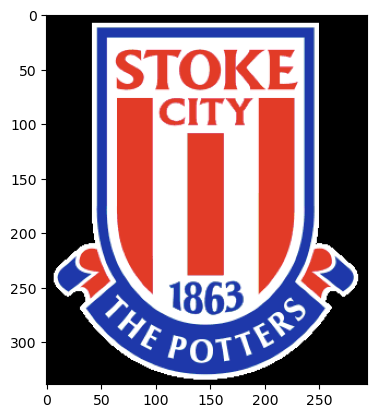

In [93]:
# To save the modified image
cv2.imwrite('modified_image.png', img)

# To display the image (if using a Jupyter notebook or similar environment)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


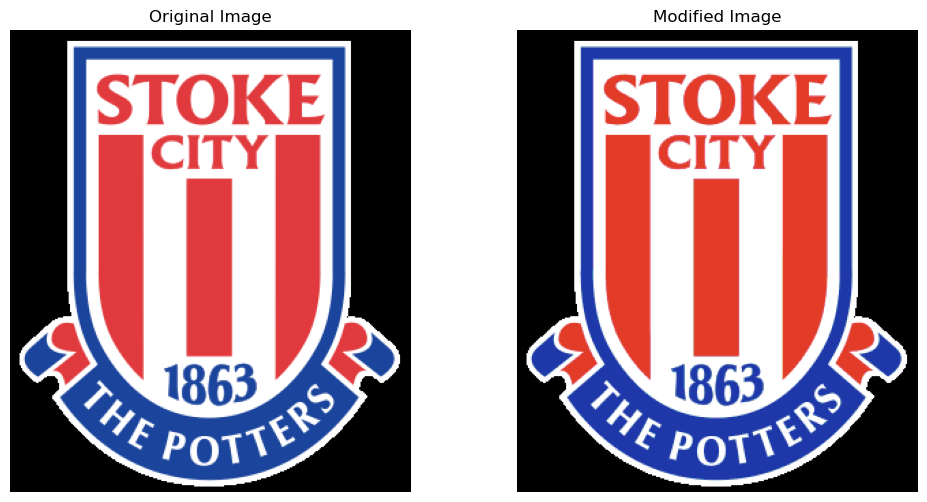

In [94]:
import cv2
import matplotlib.pyplot as plt

# Convert both images from BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_original = cv2.imread('logo-color-scraping/data/logo/Stoke_City.png')
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

# Create a figure to display both images side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_original_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Modified Image')
plt.axis('off')

plt.show()


In [190]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(colors_df)):
        d = abs(R - int(colors_df.loc[i, "R"])) + abs(G - int(colors_df.loc[i, "G"])) + abs(B - int(colors_df.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname , cr, cg, cb = colors_df.loc[i, "color_name"], colors_df.loc[i, "R"], colors_df.loc[i, "G"],colors_df.loc[i, "B"]
            arr = np.array([cr,cg,cb])
    return arr, cname

In [191]:
get_color_name(105,30,30)

(array([112,  28,  28]), 'Prune')

In [192]:
height, width, _ = np.shape(img)
img_reshape = img.reshape((height*width,3))
img_reshape

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [193]:
all_rgb = np.unique(img_reshape, axis=0)

In [194]:
for i in all_rgb:
    print(get_color_name(i[0],i[1],i[2]))

(array([0, 0, 0]), 'Black')
(array([ 39,  59, 226]), 'Palatinate Blue')
(array([ 90,  79, 207]), 'Iris')
(array([ 96,  80, 220]), 'Majorelle Blue')
(array([123, 104, 238]), 'Medium Slate Blue')
(array([146, 161, 207]), 'Ceil')
(array([147, 112, 219]), 'Medium Purple')
(array([166, 123,  91]), 'French Beige')
(array([170,  56,  30]), 'Chinese Red')
(array([171, 205, 239]), 'Pale Cornflower Blue')
(array([173, 111, 105]), 'Copper Penny')
(array([175,  64,  53]), 'Pale Carmine')
(array([177, 156, 217]), 'Light Pastel Purple')
(array([179, 139, 109]), 'Light Taupe')
(array([184, 115,  51]), 'Copper')
(array([185,  78,  72]), 'Deep Chestnut')
(array([187, 101,  40]), 'Ruddy Brown')
(array([188, 152, 126]), 'Pale Taupe')
(array([195, 176, 145]), 'Khaki (Html/Css) (Khaki)')
(array([204, 204, 255]), 'Periwinkle')
(array([205, 149, 117]), 'Antique Brass')
(array([210, 180, 140]), 'Tan')
(array([220, 208, 255]), 'Pale Lavender')
(array([221, 173, 175]), 'Pale Chestnut')
(array([222, 165, 164]), 